### `---------------Mandatory Information to fill------------`

`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Problem Statement

Develop a reinforcement learning agent using dynamic programming methods to solve the Dice game optimally. The agent will learn the optimal policy by iteratively evaluating and improving its strategy based on the state-value function and the Bellman equations.

# Scenario:
A player rolls a 6-sided die with the objective of reaching a score of **exactly** 100. On each turn, the player can choose to stop and keep their current score or continue rolling the die. If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If the player rolls any other number (2-6), that number is added to their score for that turn. The game ends when the player decides to stop and keep their score OR when the player's score reaches 100. The player wins if they reach a score of exactly 100, and loses if they roll a 1 when their score is below 100.



#Environment Details

* The environment consists of a player who can choose to either roll a 6-sided die or stop at any point.
* The player starts with an initial score (e.g., 0) and aims to reach a score of exactly 100.
* If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If they roll any other number (2-6), that number is added to their score for that turn.
* The goal is to accumulate a total of exactly 100 points to win, or to stop the game before reaching 100 points.

#### States
* State s: Represents the current score of the player, ranging from 0 to 100.
* Terminal States:
    * State s = 100: Represents the player winning the game by reaching the goal of 100 points.
    * State s = 0: Represents the player losing all points accumulated in the turn due to rolling a 1.


#### Actions
* Action a: Represents the decision to either "roll" the die or "stop" the game at the current score.
* The possible actions in any state s are either "roll" or "stop".


# Expected Outcomes:
1.	Use dynamic programming methods value iteration, policy improvement and policy evaluation to find the optimal policy for the Dice Game.
2.	Implement an epsilon-greedy policy for action selection during training to balance exploration and exploitation.
3.	Evaluate the agent's performance in terms of the probability of reaching exactly 100 points after learning the optimal policy.
4.	Use the agent's policy as the best strategy for different betting scenarios within the problem.


# Code Execution

### Initialize constants

In [9]:
import numpy as np
# Constants
goal = 100
gamma = 1.0
faces = 6
prob_roll = 1/faces

# Design a DiceGame Environment (1M)

In [10]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------

class DiceGameEnvironment:
    def __init__(self, target_score):
        # Initialize the target-score to the goal
        self.target_score = goal
        # Initialize the states
        self.states = range(goal + 1)
        # Initialize the actions. 
        self.actions = ["roll", "stop"]
        # Initialize the rewards (all zeros)
        self.rewards = np.zeros(len(self.states))
        # Update reward for target as 1 which is reward for winning.
        self.rewards[target_score] = 1
        # Initialize policy randomly with roll / stop
        self.policy = np.random.choice(self.actions, size=len(self.states)) 
        # The Value for each state.
        self.value = np.zeros(len(self.states)) 
        # The discoutn factor.
        self.discount_factor = gamma
        # # The convergence threshold
        self.theta = 1e-3 

### Define reward funtion

In [11]:
#Calculate reward function for 'stop' and 'roll' actions
#-----write your code below this line---------

def get_transition_probabilities_and_rewards(self, state, action):
    # When the target is reached the reward is 1
    if state == self.target_score:
        return [(state, 1.0, self.rewards[state])]
    
    # When the user decides to stop, the reward is 1
    if action == "stop":
        return [(state, 1.0, self.rewards[state])]
    
    # When the user decides to roll, the reward is 0 if rolled 1 or set incremental rewards
    if action == "roll":
        transitions = []
        for roll in range(1, faces + 1):
            if roll == 1:
                next_state = 0  # Reset to initial state as player looses all points
                reward = 0  # Penalty for rolling a 1
            else:
                next_state = min(state + roll, self.target_score)
                # reward is 0 if goal state is not reached
                reward = 1 if next_state is goal else 0
            
            transitions.append((next_state, 1/faces, reward))
        return transitions
    
DiceGameEnvironment.get_transition_probabilities_and_rewards = get_transition_probabilities_and_rewards

# Policy Iteration Function Definition (0.5M)

In [12]:
#For each state, Store old_policy of state s.
#Determine best_action based on maximum reward. Update policy[s] to best_action.
#Return stable when old policy = policy[s]

#-----write your code below this line---------

# The policy iteration function
def policy_iteration(self):
    # Restrict to maximum 1000 iterations
    max_iterations = 1000
    for iteration in range(max_iterations):
        stable = True
        for state in self.states:
            if state == self.target_score:
                continue
            old_action = self.policy[state]
            stop_value = 1 if state == goal else 0
            roll_value = self.bellman_update(state, "roll")
            self.policy[state] = "stop" if stop_value >= roll_value else "roll"

            if old_action != self.policy[state]:
                stable = False
        
        if (stable):
            print("Policy is stable in " + str(iteration + 1) + " iteration(s)")
            break

    return stable
     
DiceGameEnvironment.policy_iteration = policy_iteration

# Value Iteration Function Definition (0.5M)

In [13]:
# Iterate over all states except terminal state untill convergence

# Calculate expected returns V(s) for current policy by considering all possible actions.

#If action is stop:
        #Calculate reward for stopping and append to rewards.
#If action is roll:
        #For each possible roll outcome (1 to 6), Determine next_s based on roll.

# Update V(s) using the Bellman equation.

#Determine max_reward from rewards
#With probability epsilon, randomly choose a reward from rewards.

#Check convergence if delta is less than a small threshold.

#-----write your code below this line---------
# Iterate until value function converges

# The bell man update
# # V(s)= 1/6[R(s,1)+∑(i=2to6) (R(s,i)+V(s+i))]
def bellman_update(self, state, action):
    transitions = self.get_transition_probabilities_and_rewards(state, action)
    new_value = sum(prob * (reward + self.discount_factor * self.value[next_state]) for next_state, prob, reward in transitions)
    return new_value

# The policy update function based on value updates
def policy_update(self, state):
    for state in self.states:
        if state == self.target_score:
            continue
        stop_value = 1 if state == goal else 0
        roll_value = self.bellman_update(state, "roll")
        self.policy[state] = "stop" if stop_value >= roll_value else "roll"

# The value iteration function
def value_iteration(self):
    while True:
        delta = 0
        for state in self.states:
            if state == self.target_score:
                continue
            old_value = self.value[state]
            stop_value = 1 if state == goal else 0
            roll_value = self.bellman_update(state, "roll")
            new_value = max(stop_value, roll_value)
            self.value[state] = new_value
            delta = max(delta, abs(old_value - new_value))
        if delta < self.theta:
            break

    # Derive policy from the value function
    self.policy_update(state)

def print_policy(self):
    print(self.policy)

def print_value(self):
    print(self.value)
    
DiceGameEnvironment.value_iteration = value_iteration
DiceGameEnvironment.bellman_update = bellman_update
DiceGameEnvironment.policy_update = policy_update
DiceGameEnvironment.print_policy = print_policy
DiceGameEnvironment.print_value = print_value


# Executing Policy Iteration and Value Iteration Functions (1M)

Print all the iterations for both Policy and Value Iteration approaches separately. (Mandatory)

In [39]:
#Simulate the game for 100 states. Use the learned policy to get the actions.
#when its roll, randomly generate a number to find the reward.
#when its stop, get the respective reward
#determine the total cumulative reward

#-----write your code below this line---------

def play(self):
    state = 0
    while state != goal:
        action = self.policy[state]
        print(f"State: {state}, Action: {action}")
        if action == "roll":
            roll = np.random.randint(1, faces+1)
            print(f"Rolled: {roll}")
            if roll == 1:
                print("Rolled a 1, you lose!")
                return
            state += roll
            if (state > goal):
                break
        elif action == "stop":
            print(f"Final score: {state}")
            return
    print("Congratulations, you reached the goal!")

DiceGameEnvironment.play = play

goal = 100
game = DiceGameEnvironment(goal)
isStable = game.policy_iteration()
if (not isStable):
    print("The policy did not converge.")

game.value_iteration()
game.play()

Policy is stable in 2 iteration(s)
State: 0, Action: roll
Rolled: 3
State: 3, Action: roll
Rolled: 7
State: 10, Action: roll
Rolled: 4
State: 14, Action: roll
Rolled: 6
State: 20, Action: roll
Rolled: 7
State: 27, Action: roll
Rolled: 4
State: 31, Action: roll
Rolled: 4
State: 35, Action: roll
Rolled: 5
State: 40, Action: roll
Rolled: 7
State: 47, Action: roll
Rolled: 6
State: 53, Action: roll
Rolled: 1
Rolled a 1, you lose!


### Print the Learned Optimal Policy, Optimal Value Function (0.5M)

The policy:

['roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll']

The optimum values:

[0.91617795 0.91649177 0.91668543 0.91688381 0.91708703 0.9172952
 0.91750846 0.91772692 0.91795071 0.91817997 0.91841481 0.91865539
 0.91890183 0.91915429 0.9194129  0.91967783 0.91994922 0.92022724
 0.92051203 0.92080378 0.92110264 0.9214088  0

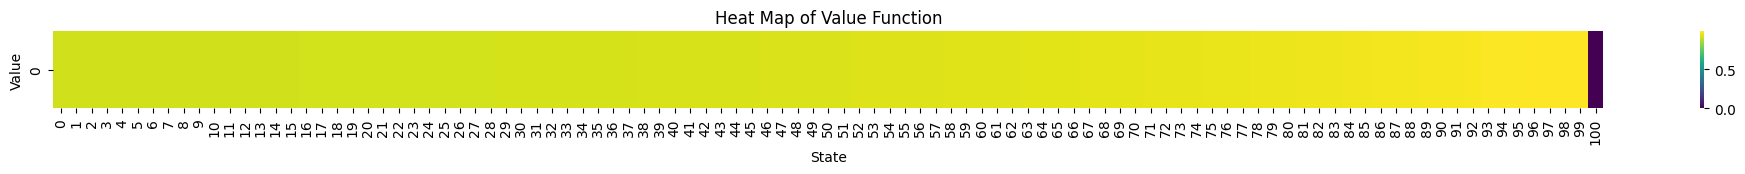

In [40]:
#-----write your code below this line---------
import matplotlib.pyplot as plt
import seaborn as sns

print("The policy:\n")
game.print_policy() # It is seen that learned policy is all to roll as we are giving reward of 1 to rolling 2-6. If we dont give any reward for rolling 2-6 and goal is not reached, then policy may be different.

print("\nThe optimum values:\n")
np.set_printoptions(suppress = True)
game.print_value()

# Create the heat map
plt.figure(figsize=(25, 1))
value_function_2d = game.value.reshape((1, -1))
sns.heatmap(value_function_2d, cmap="viridis", cbar=True, annot=False, fmt=".1f", annot_kws={"size": 8})
plt.xlabel("State")
plt.ylabel("Value")
plt.title("Heat Map of Value Function")
plt.show()

# Change in environment details (1M)

Consider the following scenario:
1. What happens if we change the goal score to 50 instead of 100? How does it affect the optimal policy and value function?
2. How would the optimal policy and value function change if the die had 8 sides instead of 6? Assume the outcomes range from 0 to 7, with each outcome having a probability of 1/8.
3. Experiment with different discount factors (e.g., 0.9, 0.95). How does discounting future rewards impact the optimal policy and value function?
4. Create a heatmap or line plot to visualize the value function over different states. How does the value function change as the state approaches the goal?


### Experimenting with Goal as 50

In [18]:
#-----write your code below this line---------
goal = 50
game = DiceGameEnvironment(goal)
game.value_iteration()
game.play()

print("The policy:\n")
game.print_policy() # It is seen that learned policy is all to roll as we are giving reward of 1 to rolling 2-6. If we dont give any reward for rolling 2-6 and goal is not reached, then policy may be different.

print("\nThe optimum values:\n")
np.set_printoptions(suppress = True)
game.print_value()


State: 0, Action: roll
Rolled: 3
State: 3, Action: roll
Rolled: 3
State: 6, Action: roll
Rolled: 6
State: 12, Action: roll
Rolled: 4
State: 16, Action: roll
Rolled: 1
Rolled a 1, you lose!
The policy:

['roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'stop']

The optimum values:

[0.96251753 0.96291062 0.9631492  0.9633972  0.96365501 0.96392299
 0.96420157 0.96449115 0.96479217 0.96510508 0.96543034 0.96576846
 0.96611994 0.96648531 0.96686511 0.9672599  0.96767028 0.96809686
 0.96854039 0.96900141 0.96948054 0.96997854 0.97049633 0.97103459
 0.97159468 0.97217608 0.97277999 0.97340806 0.97406207 0.97474185
 0.97545089 0.97617939 0.97693906 0.97773431 0.97856577 0.97942549
 0.9803250

### Experimenting with 8 - faced dice

In [41]:
# The target is set to 50 for 8 face dice
goal = 50
faces = 8
game = DiceGameEnvironment(goal)

game.policy_iteration()
game.value_iteration()
game.play()

print("The policy:\n")
game.print_policy()

print("\nThe optimum values:\n")
np.set_printoptions(suppress = True)
game.print_value()

Policy is stable in 2 iteration(s)
State: 0, Action: roll
Rolled: 6
State: 6, Action: roll
Rolled: 5
State: 11, Action: roll
Rolled: 7
State: 18, Action: roll
Rolled: 2
State: 20, Action: roll
Rolled: 8
State: 28, Action: roll
Rolled: 4
State: 32, Action: roll
Rolled: 2
State: 34, Action: roll
Rolled: 7
State: 41, Action: roll
Rolled: 6
State: 47, Action: roll
Rolled: 1
Rolled a 1, you lose!
The policy:

['roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'stop']

The optimum values:

[0.98658162 0.98688805 0.98707206 0.98725835 0.98744694 0.98763786
 0.98783116 0.98802685 0.98822497 0.98842554 0.98862858 0.98883412
 0.98904221 0.98925288 0.9894662  0.98968218 0.98990088 0.99012215
 0.99

## Different discount factors

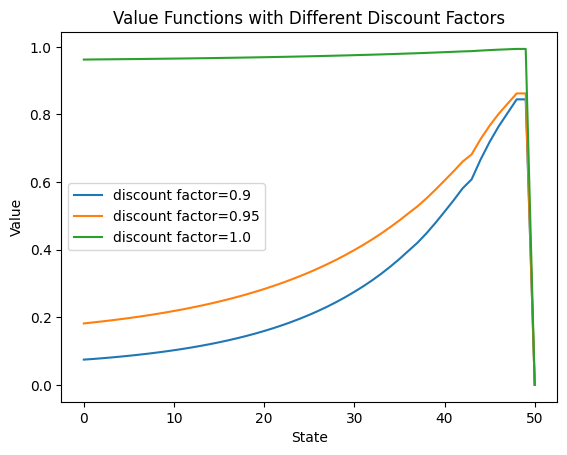

In [165]:
discountFactors = [0.9, 0.95, 1.0]
goal = 50
game = DiceGameEnvironment(goal)
faces = 6
game.states= range(goal + 1)
game.value_iteration()
value_with_various_discounts = []
for d in discountFactors:
    game.discount_factor = d
    game.value_iteration()
    value_with_various_discounts.append(game.value.copy())

for i, d in enumerate(discountFactors):
    plt.plot(value_with_various_discounts[i], label=f"discount factor={d}")

plt.title("Value Functions with Different Discount Factors")
plt.xlabel("State")
plt.ylabel("Value")
plt.legend()


## HeatMap of value function

State: 0, Action: roll
Rolled: 4
State: 4, Action: roll
Rolled: 3
State: 7, Action: roll
Rolled: 5
State: 12, Action: roll
Rolled: 2
State: 14, Action: roll
Rolled: 5
State: 19, Action: roll
Rolled: 4
State: 23, Action: roll
Rolled: 6
State: 29, Action: roll
Rolled: 2
State: 31, Action: roll
Rolled: 4
State: 35, Action: roll
Rolled: 4
State: 39, Action: roll
Rolled: 5
State: 44, Action: roll
Rolled: 4
State: 48, Action: roll
Rolled: 2
Congratulations, you reached the goal!
The policy:

['roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll' 'roll'
 'stop']

The optimum values:

[0.3833124  0.3877897  0.39232124 0.39701842 0.40188735 0.40693447
 0.41216654 0.41759047 0.42321358 0.42904252 0.4350844  

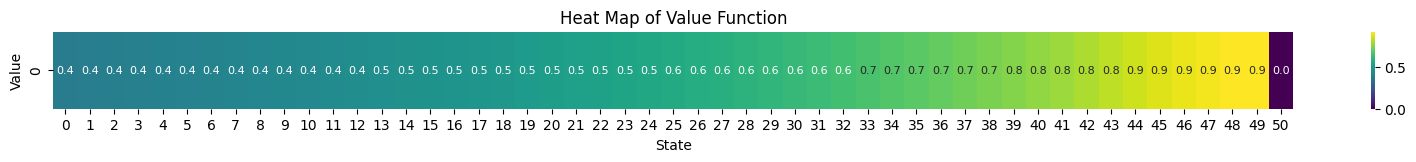

In [190]:
goal = 50
game = DiceGameEnvironment(goal)
game.states= range(goal + 1)
faces = 8
game.discount_factor = 0.95

game.value_iteration()
game.play()

print("The policy:\n")
game.print_policy() # It is seen that learned policy is all to roll as we are giving reward of 1 to rolling 2-6. If we dont give any reward for rolling 2-6 and goal is not reached, then policy may be different.

print("\nThe optimum values:\n")
np.set_printoptions(suppress = True)
game.print_value()

# Create the heat map
plt.figure(figsize=(20, 1))
value_function_2d = game.value.reshape((1, -1))
sns.heatmap(value_function_2d, cmap="viridis", cbar=True, annot=True, fmt=".1f", annot_kws={"size": 8})
plt.xlabel("State")
plt.ylabel("Value")
plt.title("Heat Map of Value Function")
plt.show()

# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for dice problem with the initial parameters and after changing the parameters.

`----write below this line------`

The best approach for solving the dice problem using reinforcement learning involves dynamically computing the expected value of each state under a given policy. By defining a reward function, policy iteration function, value iteration function, and utilizing the Bellman equation, we can create an effective strategy for maximizing the player's cumulative reward.

Initially, with parameters set to a single six-faced dice and the goal of reaching a score of 100 without rolling a 1, the optimal policy predominantly instructs the player to "roll." The value function, which estimates the expected cumulative reward, increases as the player approaches the target score. The discount factor, which determines how future rewards are valued compared to immediate rewards, further modulates this value function, either suppressing or scaling it down.

When adjusting parameters, such as changing the number of dice faces or introducing multiple players taking turns, the core approach remains consistent but adapts to the new complexity. With more faces on the dice, the probability distribution of outcomes changes, altering the expected rewards and thus the value function. In multiplayer scenarios, the strategy must account for opponents' moves, adding layers of decision-making to maximize individual scores while minimizing opponents' advantages.

The strength of this approach lies in its flexibility and scalability. By incorporating incremental rewards and optimizing the policy iteratively, the method adapts well to varying game dynamics and objectives. This dynamic programming-based reinforcement learning framework, augmented by careful consideration of discount factors and the value function, provides a robust solution applicable to diverse gaming scenarios, ensuring players can strategize effectively under different conditions.

In conclusion, while the initial setup of a single player with a six-faced dice serves as a foundational model, the adaptability of this approach allows for its extension to more complex and varied game settings, maintaining its efficacy in guiding optimal play strategies.

In [42]:
!jupyter nbconvert --to PDF "Dice_game_using_dynamic_programming.ipynb"

[NbConvertApp] Converting notebook Dice_game_using_dynamic_programming.ipynb to PDF
[NbConvertApp] Support files will be in Dice_game_using_dynamic_programming_files/
[NbConvertApp] Making directory ./Dice_game_using_dynamic_programming_files
[NbConvertApp] Writing 63661 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 161049 bytes to Dice_game_using_dynamic_programming.pdf
